# Data Visualisation

- matplotlib.pyplot

Stores the state of current plot.

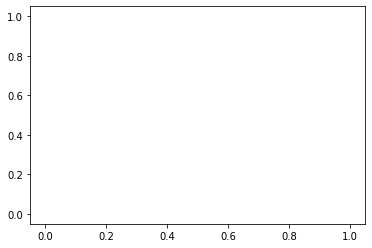

In [1]:
import matplotlib.pyplot as plt

# use this to display in notebook
%matplotlib inline

# state is stored pyplot funcs called directly as they store state
plt.plot()
plt.show()

## Basic Plot

In [2]:
import pandas as pd

# read csv (unemployment data, USA 1948-)
unrate = pd.read_csv("unrate.csv")

unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    824 non-null    object 
 1   VALUE   824 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB


In [3]:
# convert date (text) column to date
unrate["DATE"] = pd.to_datetime(unrate["DATE"])
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    824 non-null    datetime64[ns]
 1   VALUE   824 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 KB


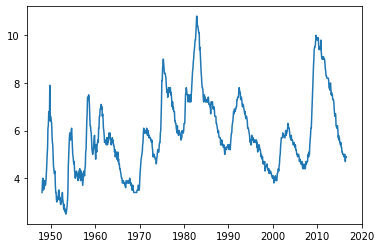

In [4]:
# plot data over time - default line plot
plt.plot(unrate["DATE"], unrate["VALUE"])
plt.show()

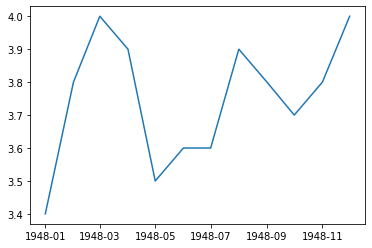

In [5]:
# plot just first 12 rows
plt.plot(unrate["DATE"].head(12), unrate["VALUE"].head(12))

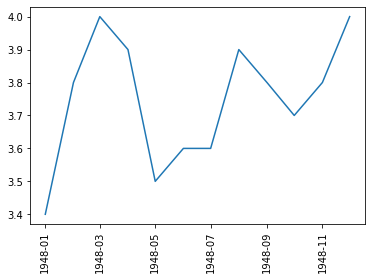

In [6]:
# rotate x labels
# rotate x labels by 90 degrees
plt.plot(unrate["DATE"].head(12), unrate["VALUE"].head(12))
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'USA Unemployment, 1948')

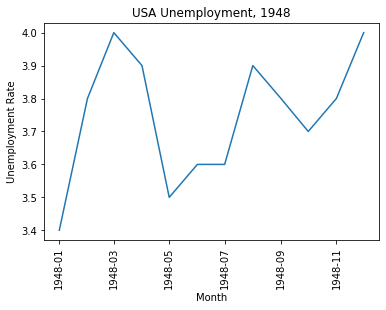

In [7]:
# title, x and y axis label
plt.plot(unrate["DATE"].head(12), unrate["VALUE"].head(12))
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("USA Unemployment, 1948")

- `pyplot` provides higher-level functions for `matplotlib`
- more control over plots is possible by accessing the underlying methods directly
- Plots are comprised of a `Figure` object with `Axes` (sub plot) objects attached
- `axes_obj = fig.add_subplot(nrows, ncols, plot_number)`

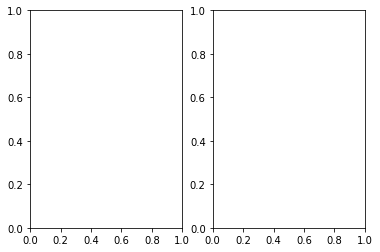

In [8]:
# figure container with two plots in one row
fig1 = plt.figure()
fig1.add_subplot(1, 2, 1) # plot 1
fig1.add_subplot(1, 2, 2) # plot 2
plt.show()

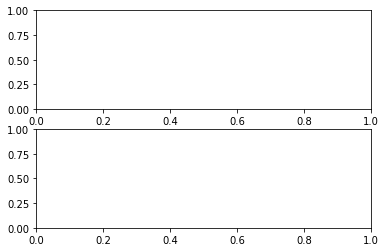

In [9]:
# figure container with two plots in two rows
fig2 = plt.figure()
fig2.add_subplot(2, 1, 1) # plot 1
fig2.add_subplot(2, 1, 2) # plot 2
plt.show()

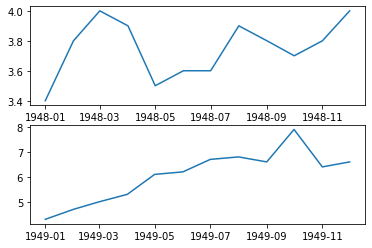

In [10]:
# plot two axes
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(unrate["DATE"][:12], unrate["VALUE"][:12])

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(unrate["DATE"][12:24], unrate["VALUE"][12:24])

plt.show()

Text(0.5, 1.0, 'Monthly Unemployment Rate, 1949')

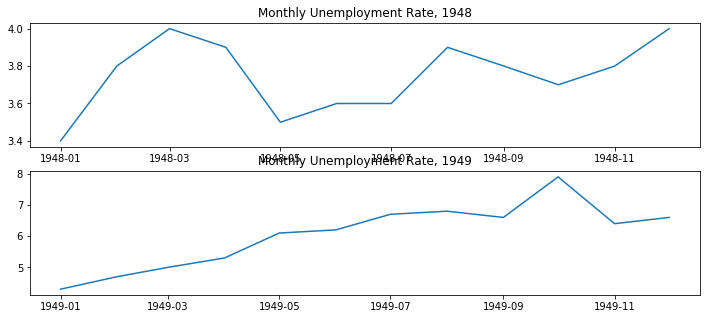

In [11]:
# Change size of the Figure container
fig = plt.figure(figsize=(12,5)) # width, height in inches
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')

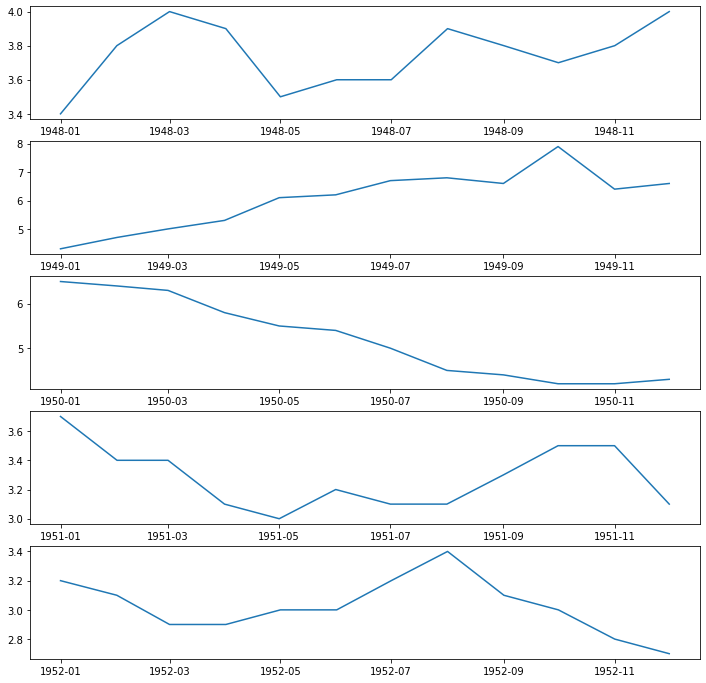

In [12]:
# plot 5 years
fig = plt.figure(figsize=(12,12))
start_year = 1948
start_index = 0
for i in range(5):
    ax = fig.add_subplot(5, 1, i+1)
    end_index = (i*12) + 12
    ax.plot(unrate[start_index:end_index]['DATE'], unrate[start_index:end_index]['VALUE'])
    start_index = end_index

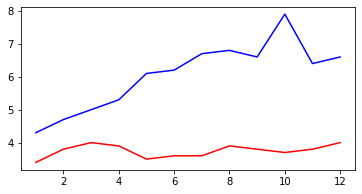

In [13]:
# add month columns and plot 2 years on one chart
unrate['MONTH'] = unrate['DATE'].dt.month
fig = plt.figure(figsize=(6, 3))
# 1948
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c="red")
#1949
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c="blue")
plt.show()

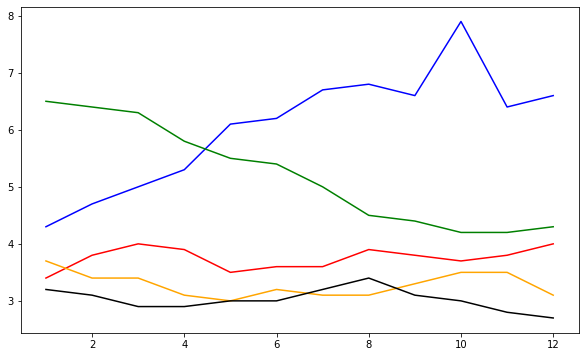

In [14]:
# five years by month on one chart
fig = plt.figure(figsize=(10, 6))
years = [(1948,"red"), (1949,"blue"), (1950,"green"), (1951,"orange"), (1952,"black")]
start_index = 0
for year, clr in years:
    plt.plot(unrate["MONTH"][start_index:start_index+12], unrate["VALUE"][start_index:start_index+12], c=clr)
    start_index += 12
plt.show()

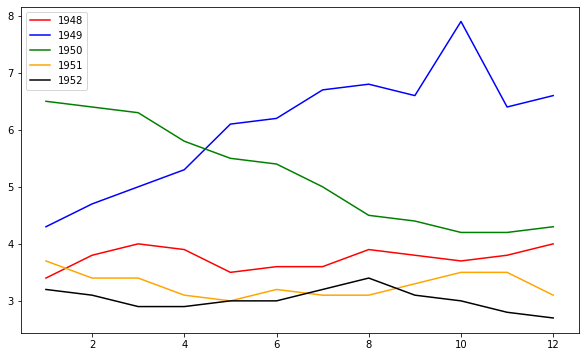

In [15]:
# adding a legend (label per axes)
# five years by month on one chart
fig = plt.figure(figsize=(10, 6))
years = [(1948,"red"), (1949,"blue"), (1950,"green"), (1951,"orange"), (1952,"black")]
start_index = 0
for year, clr in years:
    plt.plot(unrate["MONTH"][start_index:start_index+12], 
             unrate["VALUE"][start_index:start_index+12], 
             c=clr, 
             label=year)
    start_index += 12
plt.legend(loc="upper left")    
plt.show()

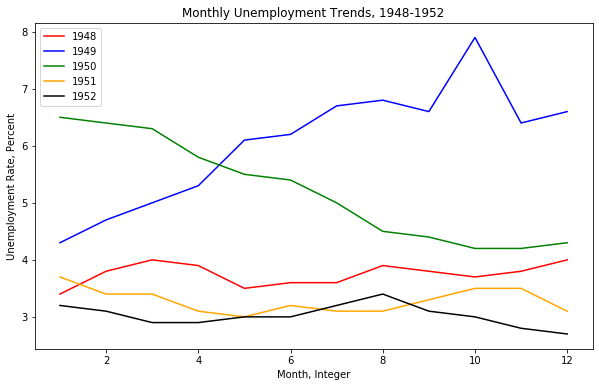

In [16]:
# Add chart and axes labels
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")
plt.show()

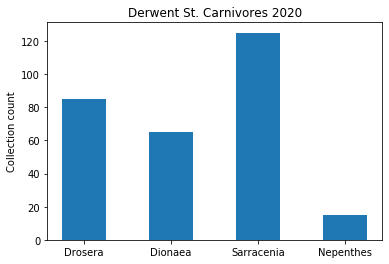

In [17]:
# Vertical Bar Plot
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange

# create some data
species = ["Drosera", "Dionaea", "Sarracenia", "Nepenthes"]
number = [85, 65, 125, 15]
collection = zip(species,number)
data = pd.DataFrame(collection, columns=["species", "count"])

# calculate the bar positions and dimensions
bar_lengths = data["count"].values
# arange 'Returns evenly spaced values within a given interval'
bar_positions = arange(len(data)) + 0.75

# this shortcut returns a figure and an axes
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_lengths, 0.5)
ax.set_xticks(bar_positions)
ax.set_xticklabels(data["species"])
ax.set_ylabel("Collection count")
plt.title("Derwent St. Carnivores 2020")
plt.show()

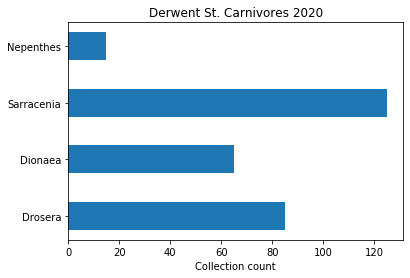

In [18]:
# Horizontal Bar Plot

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_lengths, 0.5)
ax.set_yticks(bar_positions)
ax.set_yticklabels(data["species"])
ax.set_xlabel("Collection count")
plt.title("Derwent St. Carnivores 2020")
plt.show()

## Frequency Distributions

Unique values vs count of each unique value - ie, how many times each value occurs.

2      257
3      602
4      858
5     1123
6     1378
7     1643
8     1355
9     1107
10     837
11     545
12     295
dtype: int64


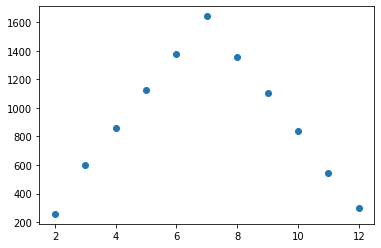

In [19]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# roll 2d6 10,000 times
roll_2d6 = []
for _ in range(10000):
    roll = random.randint(1, 6) + random.randint(1,6)
    roll_2d6.append(roll)

roll_2d6_dist = pd.Series(roll_2d6).value_counts().sort_index()
print(roll_2d6_dist)

plt.scatter(roll_2d6_dist.index, roll_2d6_dist.values)
plt.show()

### Histograms

Also show a distribution but, unlike a scatter plot, groups the distinct values into ranges
call _bins_.

This makes it easier to compare multiple distributions.

By default, `matplotlib` will spread data across 10 bins, the span of which depends on the
min and max of the sequence itself.

This isn't ideal for comparisons between different distributions so can specify the bin range
to standardise the display.

In [20]:
# sample histogram showing two plots, one above the other, to compare distributions



### Box Plots

Also [box-and-whisker plot](https://en.wikipedia.org/wiki/Box_plot)

Used to show _quartiles_ - ie, the distributions of each 15% region of the values.

For example:

![box-plot](box-plot.png)

The two regions contained within the box in the middle make up the **interquartile range**,
or [IQR](https://en.wikipedia.org/wiki/Interquartile_range). The IQR is used to measure
dispersion of the values. The ratio of the length of the box to the whiskers around the
box helps us understand how values in the distribution are spread out.

In [21]:
# Find some data and set up a box plot

# fig, ax = plt.subplots()
# ax.boxplot(norm_reviews["RT_user_norm"])
# ax.set_ylim(0,5)
# ax.set_xticklabels(["Rotten Tomatoes"])
# plt.show()

## Visually Enhanced Plots

In [22]:
import pandas as pd

women_degrees = pd.read_csv("percent-bachelors-degrees-women-usa.csv")
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


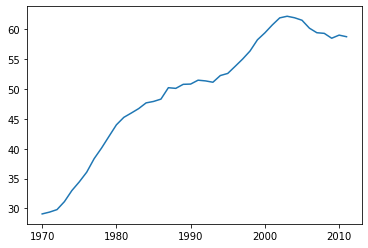

In [23]:
import matplotlib.pyplot as plt

# Line Chart: Historical percentage of women awarded Biology degrees
plt.plot(women_degrees["Year"], women_degrees["Biology"])
plt.show()

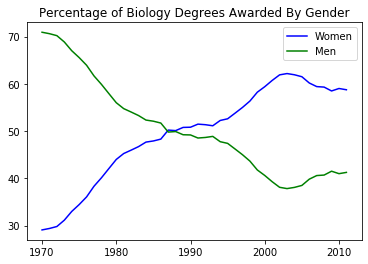

In [24]:
# Line plot with men and woman on same plot
plt.plot(women_degrees["Year"], women_degrees["Biology"], c="blue", label="Women")
plt.plot(women_degrees["Year"], 100 - women_degrees["Biology"], c="green", label="Men")
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.legend(loc="upper right")
plt.show()

Check out this book: https://www.edwardtufte.com/tufte/books_vdqi

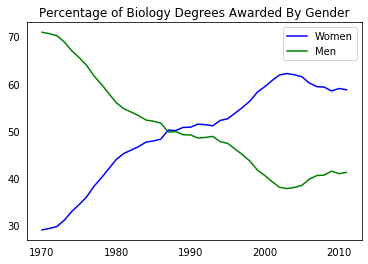

In [25]:
# As above, but with tick marks removed
fig, ax = plt.subplots()
ax.plot(women_degrees["Year"], women_degrees["Biology"], c="blue", label="Women")
ax.plot(women_degrees["Year"], 100 - women_degrees["Biology"], c="green", label="Men")
ax.tick_params(bottom=False, top=False, left=False, right=False)
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.legend(loc="upper right")
plt.show()

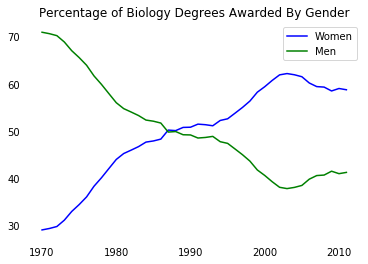

In [26]:
# As above, but hide the spines
fig, ax = plt.subplots()
ax.plot(women_degrees["Year"], women_degrees["Biology"], c="blue", label="Women")
ax.plot(women_degrees["Year"], 100 - women_degrees["Biology"], c="green", label="Men")
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.legend(loc="upper right")
plt.show()

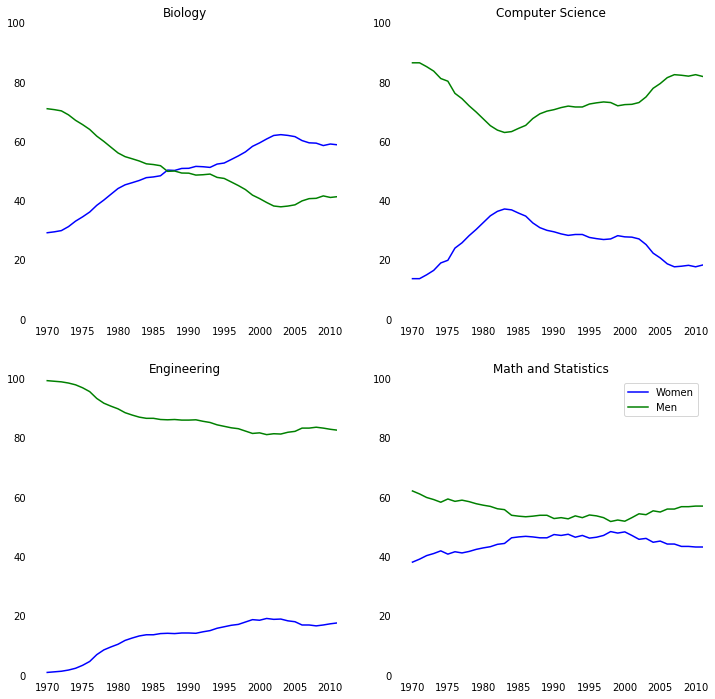

In [27]:
# Multiple plots with better data-ink ratio
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.tick_params(top=False, right=False, bottom=False, left=False)
    for loc in ["top", "right", "bottom", "left"]:
        ax.spines[loc].set_visible(False)
    ax.set_title(major_cats[sp])

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

### Colour selection

- Be mindful of colour blindness
- See [colour blind](http://tableaufriction.blogspot.com/2012/11/finally-you-can-use-tableau-data-colors.html) 10 palette

<span style="background-color: rgb(0,107,164); padding: 5px;">0,107,164</span>
<span style="background-color: rgb(255, 128, 14); padding: 5px;">255, 128, 14</span>
<span style="background-color: rgb(171, 171, 171); padding: 5px;">171, 171, 171</span>
<span style="background-color: rgb(89, 89, 89); padding: 5px;">89, 89, 89</span>
<span style="background-color: rgb(95, 158, 209); padding: 5px;">95, 158, 209</span>
<span style="background-color: rgb(200, 82, 0); padding: 5px;">200, 82, 0</span>
<span style="background-color: rgb(137, 137, 137); padding: 5px;">137, 137, 137</span>
<span style="background-color: rgb(162, 200, 236); padding: 5px;">162, 200, 236</span>
<span style="background-color: rgb(255, 188, 121); padding: 5px;">255, 188, 121</span>
<span style="background-color: rgb(207, 207, 207); padding: 5px;">207, 207, 207</span>

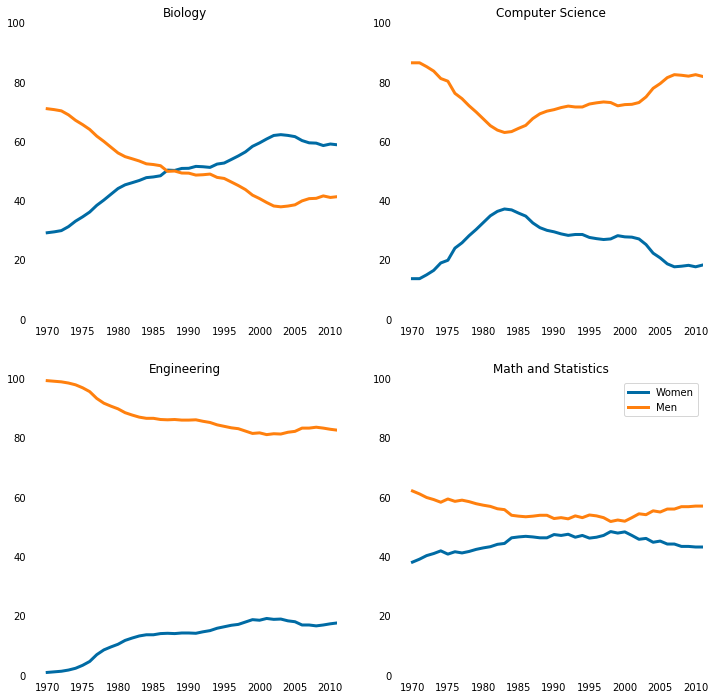

In [28]:
# Line plot using colour-blind pallete and thicker lines
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, linewidth=3, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)

plt.legend(loc='upper right')
plt.show()


Often, the layout and positioning will assist with telling the story...

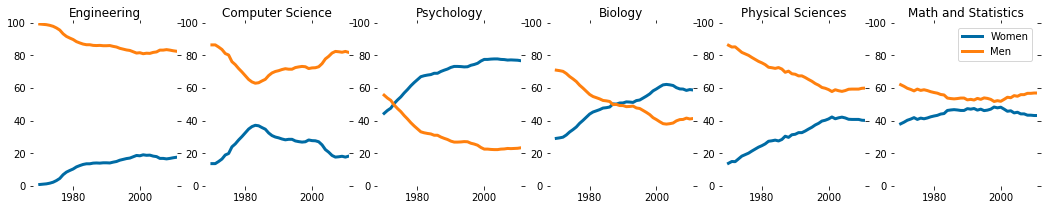

In [29]:
# Shows STEM subjects in order of decreasing gender gap

stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

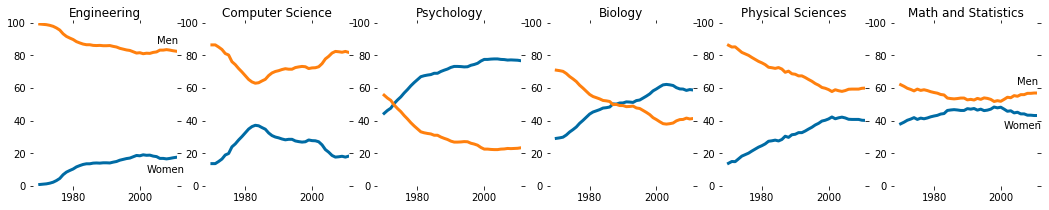

In [30]:
# Further enhanced by removing legend and annotating plot lines
# Although, if the data changes the labels are bung? 
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    if stem_cats[sp] == "Engineering":
        ax.text(2005, 87, "Men")
        ax.text(2002, 8, "Women")
    if stem_cats[sp] == "Math and Statistics":
        ax.text(2005, 62, "Men")
        ax.text(2001, 35, "Women")    
        
plt.show()

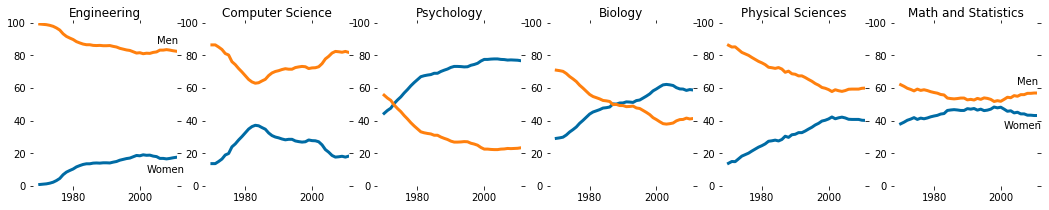

In [31]:
# Furth enhances by removing legend and annotating plot lines
# Although, if the data changes the labels are bung? 
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    if stem_cats[sp] == "Engineering":
        ax.text(2005, 87, "Men")
        ax.text(2002, 8, "Women")
    if stem_cats[sp] == "Math and Statistics":
        ax.text(2005, 62, "Men")
        ax.text(2001, 35, "Women")    
        
plt.show()

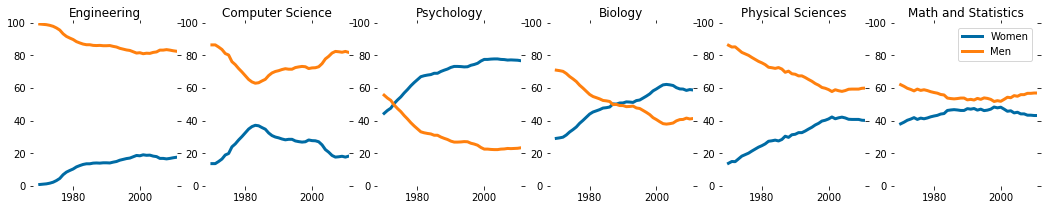

In [32]:
# Shows STEM subjects in order of decreasing gender gap

stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

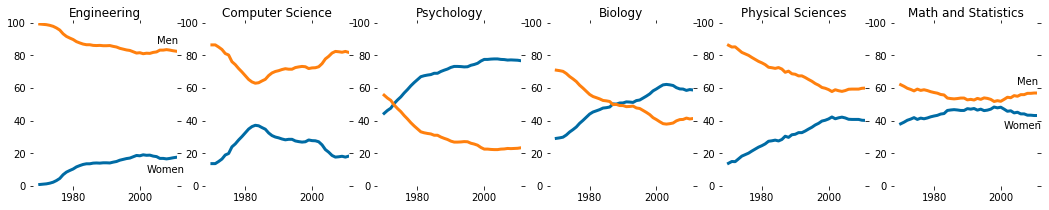

In [33]:
# Furth enhances by removing legend and annotating plot lines
# Although, if the data changes the labels are bung? 
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    if stem_cats[sp] == "Engineering":
        ax.text(2005, 87, "Men")
        ax.text(2002, 8, "Women")
    if stem_cats[sp] == "Math and Statistics":
        ax.text(2005, 62, "Men")
        ax.text(2001, 35, "Women")    
        
plt.show()

## seaborn plotting library

Provides high-level functions for nicely formatted plots

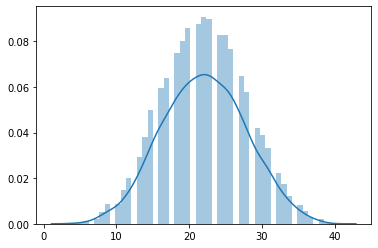

In [34]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# roll 4d10 10,000 times
roll_4d10 = []
for _ in range(10000):
    roll = random.randint(1, 10) + random.randint(1,10) + random.randint(1, 10) + random.randint(1, 10)
    roll_4d10.append(roll)

# data = pd.Series(roll_2d6).value_counts().sort_index()
data = pd.Series(roll_4d10)

# seaborn distplot - includes histogram with a line (kernel density plot)
sns.distplot(data)
plt.show()


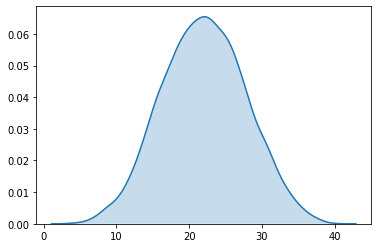

In [35]:
# KDE plot on its own, shade area under the curve
sns.kdeplot(data, shade=True)
plt.show()



[Small multiples](https://en.wikipedia.org/wiki/Small_multiple) can be created easily with seaborn - it handles a lot of the work automatically, like ensuring same axis scales.

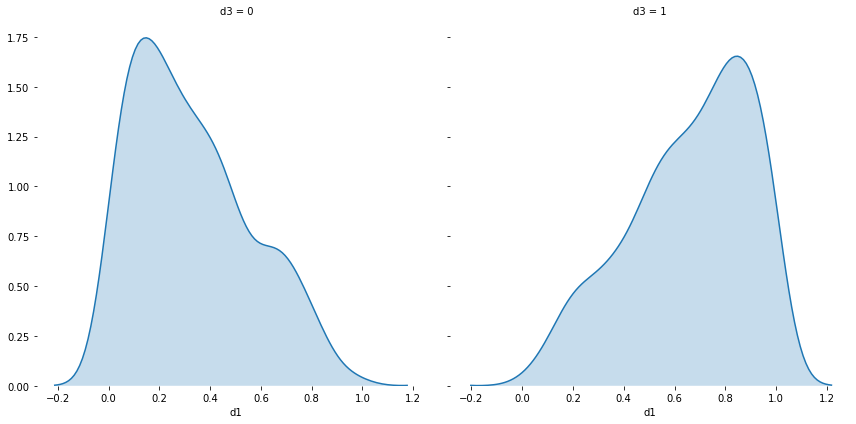

In [36]:
# Create a small multiple
import random
import seaborn as sns
import pandas as pd

# make some data
data1 = [random.random() for _ in range(0, 1000)]
data2 = [random.random() for _ in range(0, 1000)]
df = pd.DataFrame()
df["d1"] = data1
df["d2"] = data2
df["d3"] = 0
df.loc[df["d1"] + df["d2"] < 1, "d3"] = 0
df.loc[df["d1"] + df["d2"] >= 1, "d3"] = 1


# FacetGrid represents the layout of the plots, col= specifies the 
# column containing the unique values, each of which will be plotted 
# on a new chart.
fg = sns.FacetGrid(df, col="d3", height=6)
# map through each of the values (in d3) and apply this chart
fg.map(sns.kdeplot, "d1", shade=True)
sns.despine(left=True, bottom=True)

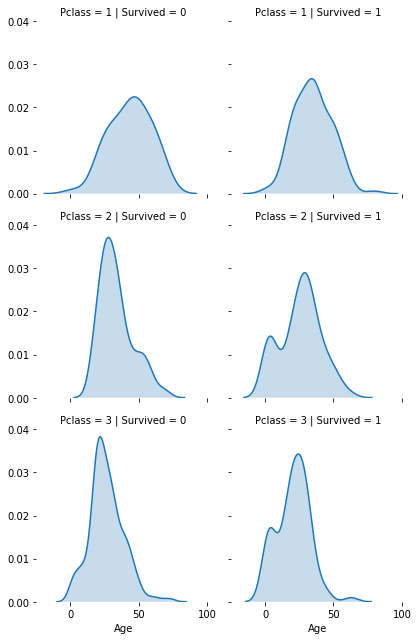

In [37]:
# Specify two conditions (col and row) for comparison - shows each unique combination

# import titanic data and clean up
titanic = pd.read_csv("titanic.csv")[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].dropna()
titanic.head()

g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()


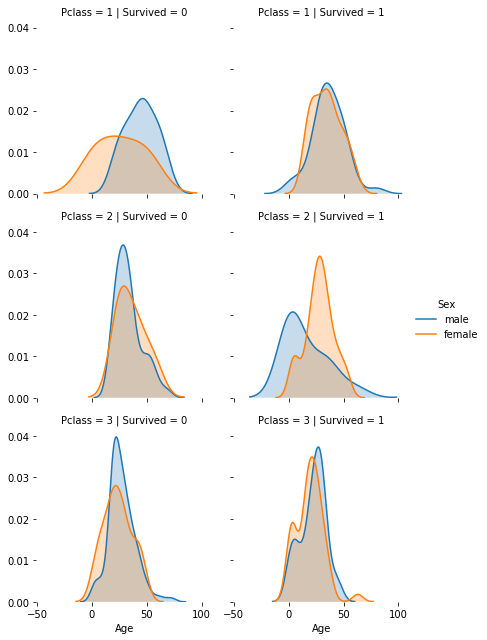

In [38]:
# Specify a third condition using hue, and add a legend
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", height=3)
g.map(sns.kdeplot, "Age", shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()

## Visualising Geographic Data

Using `basemap` library

In [39]:
# can't get this to install properly
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
#
# m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
# longitudes = airports["longitude"].tolist()
# latitudes = airports["latitude"].tolist()
# x, y = m(longitudes, latitudes)
# m.scatter(x, y, s=1)
# m.drawcoastlines()
# plt.show()

Other libraries:
- [Creating 3D plots using Plotly](https://plot.ly/python/3d-scatter-plots/)
- [Creating interactive visualizations using bokeh](http://bokeh.pydata.org/en/latest/)
- [Creating interactive map visualizations using folium](http://python-visualization.github.io/folium/)

References:
- [Visual Display of Quantitative Information](https://www.amazon.com/Visual-Display-Quantitative-Information/dp/0961392142)
- [Visual Explanations: Images and Quantities, Evidence and Narrative](https://www.amazon.com/Visual-Explanations-Quantities-Evidence-Narrative/dp/0961392126)


import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()


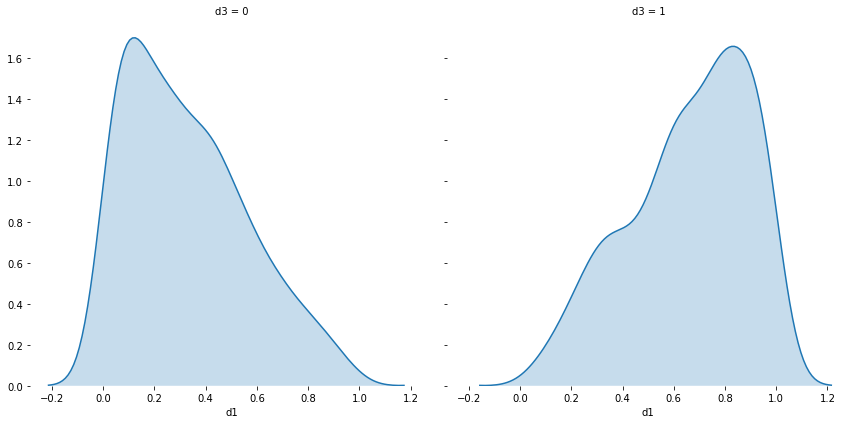

In [40]:
# Create a small multiple
import random
import seaborn as sns
import pandas as pd

# make some data
data1 = [random.random() for _ in range(0, 1000)]
data2 = [random.random() for _ in range(0, 1000)]
df = pd.DataFrame()
df["d1"] = data1
df["d2"] = data2
df["d3"] = 0
df.loc[df["d1"] + df["d2"] < 1, "d3"] = 0
df.loc[df["d1"] + df["d2"] >= 1, "d3"] = 1


# FacetGrid represents the layout of the plots, col= specifies the 
# column containing the unique values, each of which will be plotted 
# on a new chart.
fg = sns.FacetGrid(df, col="d3", height=6)
# map through each of the values (in d3) and apply this chart
fg.map(sns.kdeplot, "d1", shade=True)
sns.despine(left=True, bottom=True)

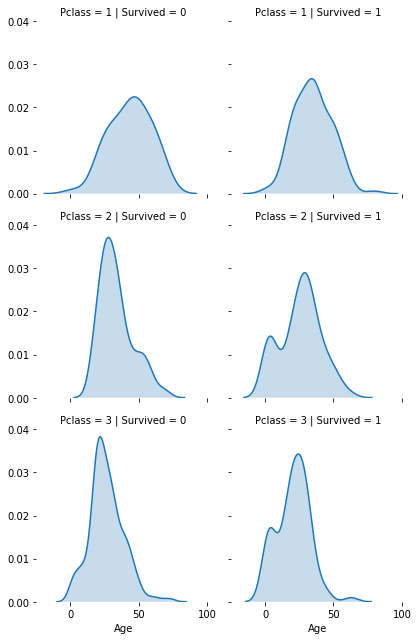

In [41]:
# Specify two conditions (col and row) for comparison - shows each unique combination

# import titanic data and clean up
titanic = pd.read_csv("titanic.csv")[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].dropna()
titanic.head()

g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()


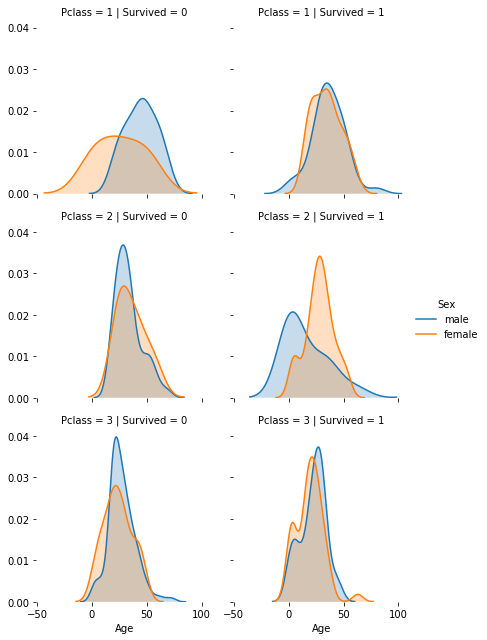

In [42]:
# Specify a third condition using hue, and add a legend
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", height=3)
g.map(sns.kdeplot, "Age", shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()

## Visualising Geographic Data

Using `basemap` library

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


NameError: name 'airports' is not defined